In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.datasets import fetch_olivetti_faces
from sklearn.neighbors import KNeighborsClassifier

Text(0.5, 0.98, 'some_faces')

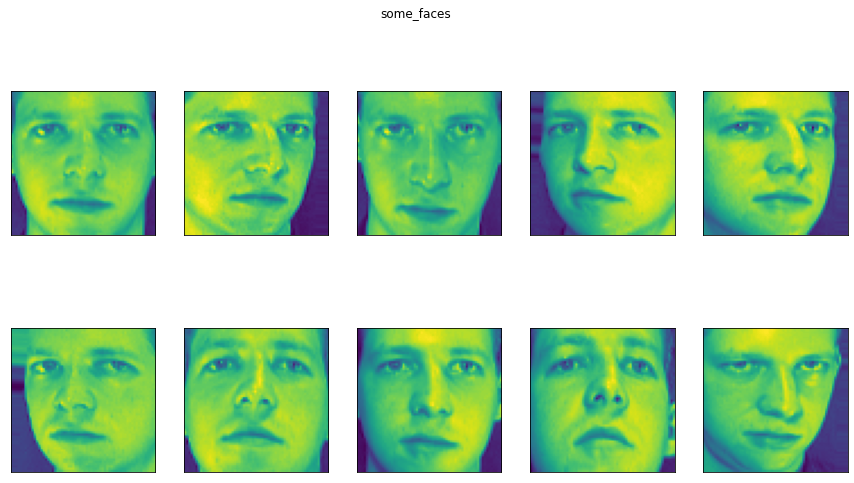

In [4]:
faces = fetch_olivetti_faces()
image_shape = faces.images[0].shape
fix, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(faces.target, faces.images, axes.ravel()):
    ax.imshow(image)
    #ax.set_title(people.target_names[target])
plt.suptitle("some_faces")


In [5]:
X = faces.data
#X = people.images
y = faces.target


In [12]:
from sklearn.decomposition import PCA
# Mantenemos las primeras 2 componentes principales de los datos
pca = PCA(n_components=20, random_state=0)
# Ajustamos PCA al dataset de cancer ya escalado
pca.fit(X)
# Transformamos los datos en las primeras dos componentes principales
X_pca = pca.transform(X)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
# Dividimos entre datos de entrenamiento y de prueba
F_train, F_test, a_train, a_test = train_test_split(X, y, random_state=0)

F_train_pca =pca.transform(F_train)
F_test_pca = pca.transform(F_test)
# Hacemos un KNeighborClassifier tomando en cuenta 1 vecino
knn = KNeighborsClassifier()
knn.fit(F_train_pca, a_train)
knn.score(F_test_pca, a_test)

0.72

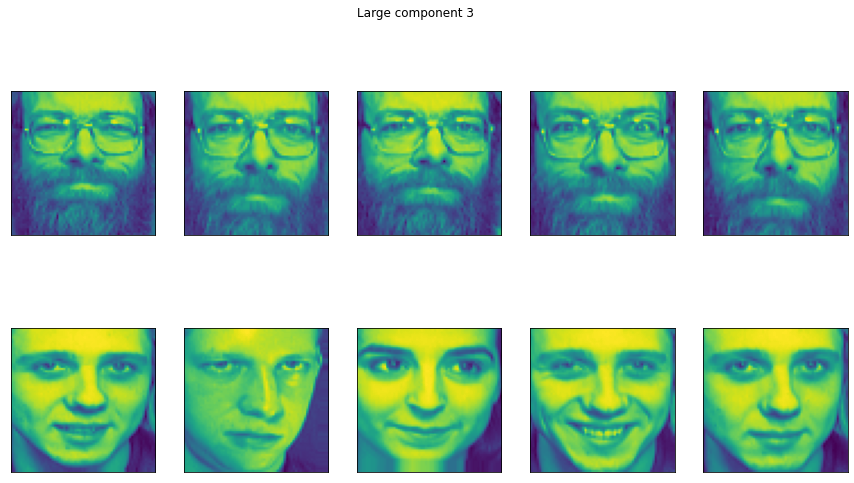

In [14]:
compn = 2
# Imprimimos las fotos más cercanas a la tercera componente
inds = np.argsort(F_train_pca[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Large component 3")
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(F_train[ind].reshape(image_shape))

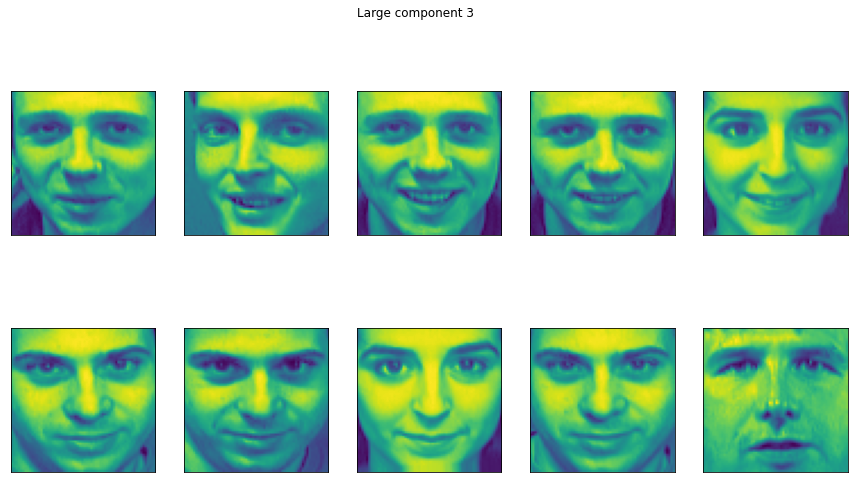

In [15]:
compn = 5
# Imprimimos las fotos más cercanas a la tercera componente
inds = np.argsort(F_train_pca[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Large component 3")
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(F_train[ind].reshape(image_shape))